# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
Y = iris.target


In [12]:
u = np.mean(X, axis=0)
Z = X - u

In [32]:
eigenvectors

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [39]:
first_two_vectors.shape

(2, 4)

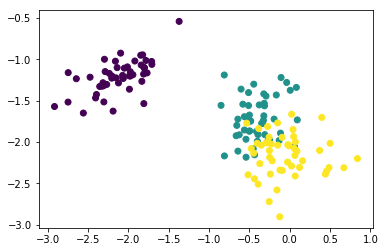

In [38]:
# covariation = np.cov(Z.transpose())
covariation = np.dot(Z.T, Z)/len(Z)
eigenvalues, eigenvectors = np.linalg.eig(covariation)
# eigentuples = [[eigenvalues[i], eigenvectors[i]] for i in range(X.shape[1])]
# eigentuples.sort(key=lambda x: x[0], reverse=True)

# first_two_tuples = eigentuples[0:2]
# first_two_vectors = np.array([first_two_tuples[i][1] for i in range(2)])
first_two_vectors = eigenvectors[:2]
two_dimensional = first_two_vectors.dot(X.transpose())

plt.scatter(two_dimensional[1], two_dimensional[0], c = Y)
plt.show()

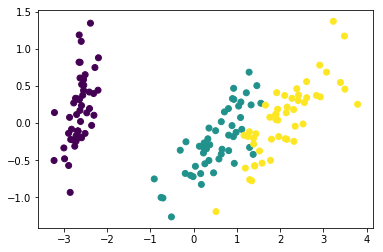

In [14]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(Z)
X_pca = pca.transform(Z)

plt.scatter(X_pca[:,0], X_pca[:,1], c = Y)
plt.show()

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

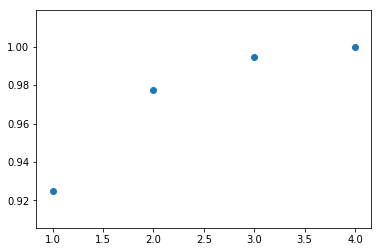

In [15]:
coverage = []
coverage_sum = 0
for value, arrow in eigentuples:
    coverage_sum = coverage_sum + value;
    coverage.append(coverage_sum);

plt.scatter([i for i in range(1, len(eigentuples) + 1)], [i / coverage_sum for i in coverage])
plt.show()